# <b> Random Forest Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

df = pd.read_csv(os.path.join('NYPD_Arrest_Data_Clean.csv'))
df2 = pd.read_csv(os.path.join('NYPD_Arrest_Data_Clean_Demographics.csv'))

In [3]:
df

,OFNS_DESC,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,MONTH,FALL,SPRING,SUMMER,WINTER,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN_ISLAND
0,17,0,105,0,40.737043,-73.735514,1,False,False,False,True,False,False,False,True,False
1,4,0,107,71,40.732881,-73.807899,2,False,False,False,True,False,False,False,True,False
2,17,0,48,0,40.855109,-73.892818,3,False,True,False,False,True,False,False,False,False
3,17,0,121,0,40.628967,-74.163275,5,False,True,False,False,False,False,False,False,True
4,17,0,100,0,40.591980,-73.800066,6,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193605,47,1,109,0,40.757691,-73.834115,9,True,False,False,False,False,False,False,True,False
193606,5,1,34,0,40.856808,-73.928265,9,True,False,False,False,False,False,True,False,False
193607,7,0,23,0,40.786116,-73.942614,9,True,False,False,False,False,False,True,False,False
193608,43,1,44,1,40.827812,-73.925929,9,True,False,False,False,True,False,False,False,False


In [4]:
df2

,OFNS_DESC,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,MONTH,FALL,SPRING,SUMMER,...,AGE_GROUP_<18,PERP_SEX_F,PERP_SEX_M,PERP_RACE_AMERICAN INDIAN/ALASKAN NATIVE,PERP_RACE_ASIAN / PACIFIC ISLANDER,PERP_RACE_BLACK,PERP_RACE_BLACK HISPANIC,PERP_RACE_UNKNOWN,PERP_RACE_WHITE,PERP_RACE_WHITE HISPANIC
0,17,0,105,0,40.737043,-73.735514,1,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,4,0,107,71,40.732881,-73.807899,2,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,17,0,48,0,40.855109,-73.892818,3,False,True,False,...,False,False,True,False,False,True,False,False,False,False
3,17,0,121,0,40.628967,-74.163275,5,False,True,False,...,False,False,True,False,False,False,False,False,True,False
4,17,0,100,0,40.591980,-73.800066,6,False,False,True,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193605,47,1,109,0,40.757691,-73.834115,9,True,False,False,...,False,False,True,False,False,False,False,False,False,True
193606,5,1,34,0,40.856808,-73.928265,9,True,False,False,...,False,False,True,False,False,False,False,False,False,True
193607,7,0,23,0,40.786116,-73.942614,9,True,False,False,...,False,False,True,False,False,False,False,False,True,False
193608,43,1,44,1,40.827812,-73.925929,9,True,False,False,...,False,False,True,False,False,True,False,False,False,False


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='OFFENSE_LEVEL')
y = df['OFFENSE_LEVEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

X2 = df2.drop(columns='OFFENSE_LEVEL')
y2 = df2['OFFENSE_LEVEL']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=1234)

# <b> Random Forest for Data without Demographics

In [8]:
# run random forest classifier on df
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=1234)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy_score(y_test, y_pred)

print('Accuracy of Random Forest:',(accuracy_score(y_test, y_pred)))

Accuracy of Random Forest: 0.9151042473701427


# <b> Random Forest for Data with Demographics

In [9]:
# run random forest classifier on df2
rf2 = RandomForestClassifier(n_estimators=100, random_state=1234)
rf2.fit(X_train2, y_train2)
y_pred2 = rf2.predict(X_test2)

accuracy_score(y_test2, y_pred2)

print('Accuracy of Random Forest:',(accuracy_score(y_test2, y_pred2)))

Accuracy of Random Forest: 0.9061859752423257


# <b> Hyperparameter Tuning

In [16]:
# run GridSearchCV on df
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [200, 300, 500],
              'min_samples_split': [5],
              'max_depth': [20, 30, 40],
              'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)
grid_search.best_params_

print('Best parameters for Random Forest:',grid_search.best_params_)
print('Best score for Random Forest:',grid_search.best_score_)
print('Best estimator for Random Forest:',grid_search.best_estimator_)
#Best parameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
#Best score for Random Forest: 0.9106672504826232

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[CV 1/3] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.910 total time=  13.9s
[CV 2/3] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.910 total time=  14.0s
[CV 3/3] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.910 total time=  14.1s
[CV 1/3] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.909 total time=  14.0s
[CV 3/3] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.910 total time=  16.8s
[CV 2/3] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.910 total time=  17.9s
[CV 1/3] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.909 total time=  20.7s
[CV 2/3] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.907 total time=  13.5s
[CV 3/3] END max_depth=20, min_samples_leaf=2, min_sampl

/Users/annahauk/Desktop/CS513/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 1/3] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.905 total time=  13.1s
[CV 2/3] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.905 total time=  12.8s
[CV 3/3] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.905 total time=  13.1s
[CV 1/3] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.908 total time=  33.4s
[CV 2/3] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.908 total time=  33.1s
[CV 1/3] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=0.905 total time=  19.9s
[CV 2/3] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=0.905 total time=  19.7s
[CV 3/3] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=0.905 total time=  20.3s
[CV 3/3] END max_depth=20, min_samples_leaf=2, min_sampl

In [14]:
# run GridSearchCV on df2
param_grid2 = {'n_estimators': [150, 200, 250, 300, 500, 1000], 
              'max_depth': [20, 30, 40],
              'min_samples_split': [5],
              'min_samples_leaf': [1]}
grid_search2 = GridSearchCV(estimator=rf2, param_grid=param_grid2, cv=3, n_jobs=-1, verbose=3)
grid_search2.fit(X_train2, y_train2)
grid_search2.best_params_

print('Best parameters for Random Forest:',grid_search2.best_params_)
print('Best score for Random Forest:',grid_search2.best_score_)
print('Best estimator for Random Forest:',grid_search2.best_estimator_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[CV 1/3] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.902 total time=  11.5s
[CV 2/3] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.902 total time=  11.4s
[CV 3/3] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.903 total time=  12.0s


/Users/annahauk/Desktop/CS513/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 3/3] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.904 total time=  15.1s
[CV 1/3] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.902 total time=  17.0s
[CV 2/3] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.902 total time=  17.2s
[CV 1/3] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=250;, score=0.902 total time=  22.2s
[CV 2/3] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=250;, score=0.902 total time=  21.9s
[CV 3/3] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=250;, score=0.904 total time=  22.4s
[CV 1/3] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.904 total time=  14.9s
[CV 1/3] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.902 total time=  26.4s
[CV 2/3] END max_depth=30, min_samples_leaf=1, min_sampl

# <b> Analysis, Accuracy, and Metrics

In [17]:
#Best parameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
# Best score for Random Forest: 0.9106672504826232

# Best parameters for Random Forest: {'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
# Best score for Random Forest: 0.9052218422235416

# make best random forest model for df
rf_best = RandomForestClassifier(n_estimators=200, max_depth=30, min_samples_split=5, min_samples_leaf=1, random_state=1234)
rf_best.fit(X_train, y_train)
y_pred_best = rf_best.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_best)
print('Accuracy of Random Forest:', accuracy)

# make best random forest model for df2
rf_best2 = RandomForestClassifier(n_estimators=300, max_depth=40, min_samples_split=5, min_samples_leaf=1, random_state=1234)
rf_best2.fit(X_train2, y_train2)
y_pred_best2 = rf_best2.predict(X_test2)

accuracy2 = accuracy_score(y_test2, y_pred_best2)
print('Accuracy of Random Forest:', accuracy2)


Accuracy of Random Forest: 0.9179966599521374
Accuracy of Random Forest: 0.9084069349035002


In [18]:
# classification report for df
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_best))

# classification report for df2
print(classification_report(y_test2, y_pred_best2))


              precision    recall  f1-score   support

           0       0.89      0.92      0.91     24823
           1       0.94      0.92      0.93     32721
           2       0.97      0.73      0.83       539

    accuracy                           0.92     58083
   macro avg       0.93      0.86      0.89     58083
weighted avg       0.92      0.92      0.92     58083

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     24823
           1       0.94      0.90      0.92     32721
           2       0.99      0.66      0.79       539

    accuracy                           0.91     58083
   macro avg       0.93      0.83      0.87     58083
weighted avg       0.91      0.91      0.91     58083



In [19]:
# Generate classification report
report = classification_report(y_test, y_pred_best, digits=2, output_dict=True)
df = pd.DataFrame(report).T

# Convert support column to integer
df['support'] = df['support'].apply(int)

# Apply background gradient
styled_df = df.style.background_gradient(cmap='viridis', subset=pd.IndexSlice['0':'9', :'f1-score'])

# Display the styled DataFrame
styled_df

,precision,recall,f1-score,support
0,0.889875,0.924828,0.907015,24823
1,0.940086,0.915895,0.927833,32721
2,0.970443,0.730983,0.833862,539
accuracy,0.917997,0.917997,0.917997,0
macro avg,0.933468,0.857235,0.889570,58083
weighted avg,0.918909,0.917997,0.918064,58083


In [20]:
# Generate classification report
report = classification_report(y_test2, y_pred_best2, digits=2, output_dict=True)
df = pd.DataFrame(report).T

# Convert support column to integer
df['support'] = df['support'].apply(int)

# Apply background gradient
styled_df = df.style.background_gradient(cmap='viridis', subset=pd.IndexSlice['0':'9', :'f1-score'])

# Display the styled DataFrame
styled_df

,precision,recall,f1-score,support
0,0.874675,0.920799,0.897145,24823
1,0.935389,0.903029,0.918924,32721
2,0.988950,0.664193,0.794673,539
accuracy,0.908407,0.908407,0.908407,0
macro avg,0.933005,0.829340,0.870247,58083
weighted avg,0.909938,0.908407,0.908463,58083


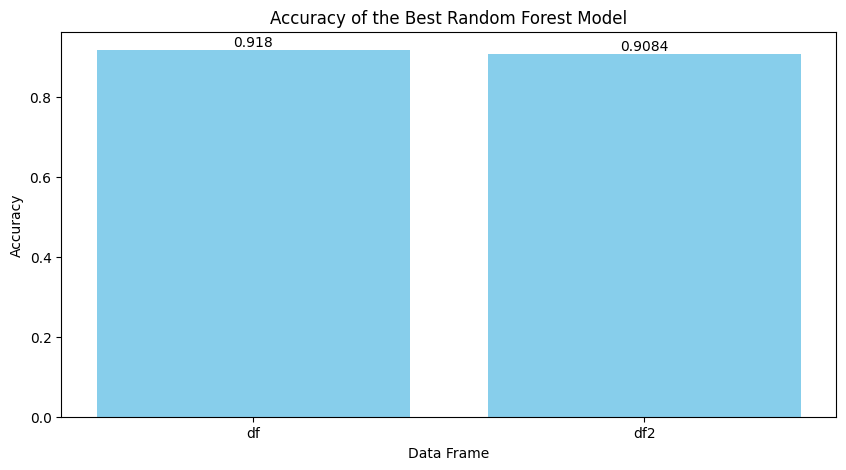

In [22]:
# plot the accuracy of the best random forest model for df and df2
accuracies = [accuracy, accuracy2]

plt.figure(figsize=(10, 5))
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, str(round(v, 4)), ha='center')
plt.bar(['df', 'df2'], [accuracy, accuracy2], color='skyblue')
plt.xlabel('Data Frame')
plt.ylabel('Accuracy')
plt.title('Accuracy of the Best Random Forest Model')
plt.show()

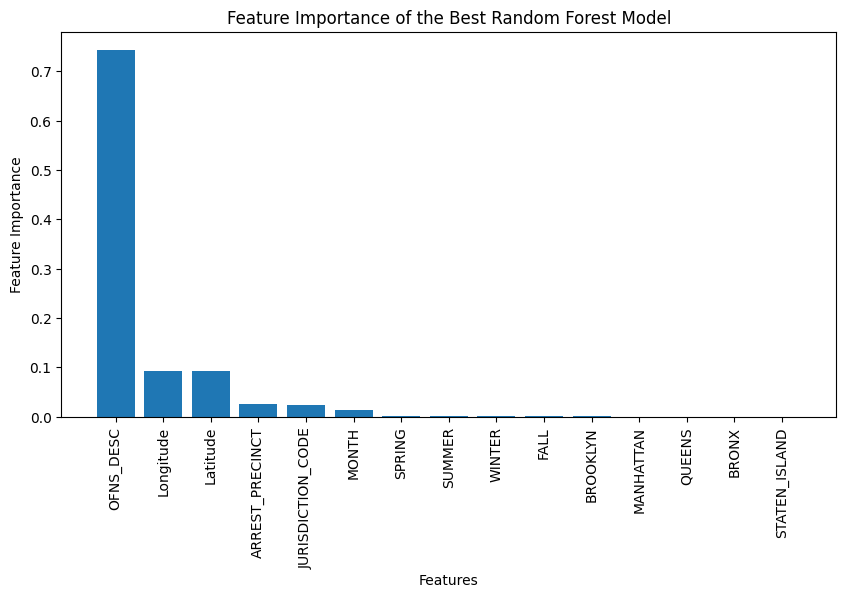

In [24]:
# plot the feature importance of the best random forest model for df
feature_importances = rf_best.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 5))
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(features)[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance of the Best Random Forest Model')
plt.show()


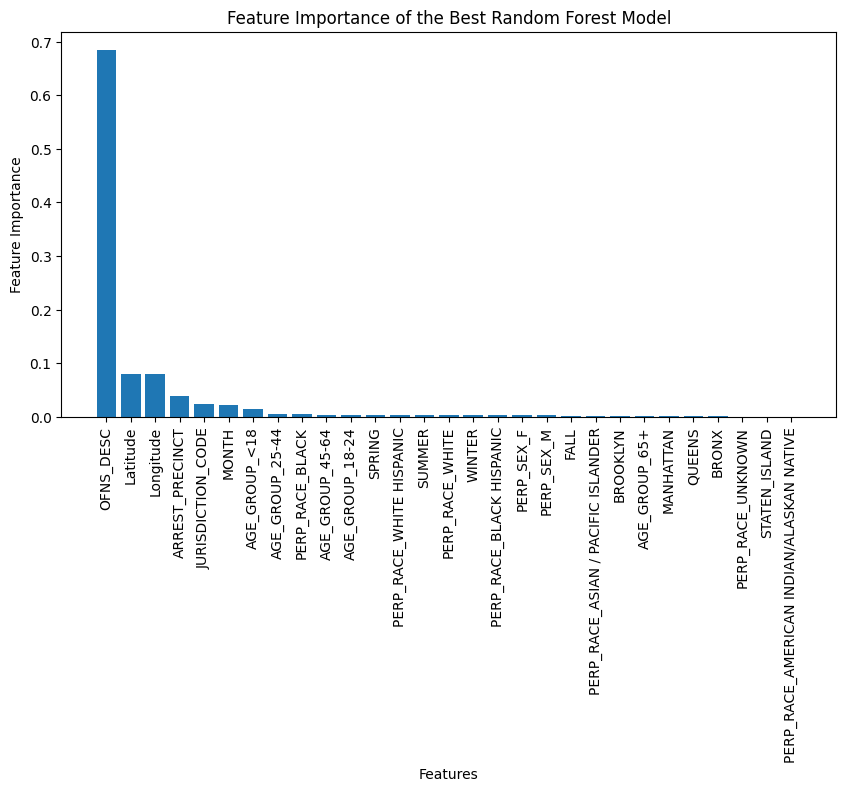

In [25]:
#plot the feature importance of the best random forest model for df2
feature_importances2 = rf_best2.feature_importances_
features2 = X2.columns
indices2 = np.argsort(feature_importances2)[::-1]

plt.figure(figsize=(10, 5))
plt.bar(range(X2.shape[1]), feature_importances2[indices2], align='center')
plt.xticks(range(X2.shape[1]), np.array(features2)[indices2], rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance of the Best Random Forest Model')
plt.show()

# <b> R50

In [30]:
# train a model for df with entropy criterion for random forest
rf_entropy = RandomForestClassifier(n_estimators=200, max_depth=30, min_samples_split=5, min_samples_leaf=1, criterion='entropy', random_state=1234)
rf_entropy.fit(X_train, y_train)
y_pred_entropy = rf_entropy.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

print('Accuracy of Random Forest with Entropy Criterion:', accuracy_entropy)

Accuracy of Random Forest with Entropy Criterion: 0.9137441247869428


In [31]:
# print classification report for df with entropy criterion
print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90     24823
           1       0.94      0.91      0.92     32721
           2       0.97      0.72      0.83       539

    accuracy                           0.91     58083
   macro avg       0.93      0.85      0.88     58083
weighted avg       0.91      0.91      0.91     58083



In [32]:
# style the classification report for df with entropy criterion
report_entropy = classification_report(y_test, y_pred_entropy, digits=2, output_dict=True)
df_entropy = pd.DataFrame(report_entropy).T
df_entropy['support'] = df_entropy['support'].apply(int)
styled_df_entropy = df_entropy.style.background_gradient(cmap='viridis', subset=pd.IndexSlice['0':'9', :'f1-score'])
styled_df_entropy

,precision,recall,f1-score,support
0,0.885476,0.919792,0.902308,24823
1,0.935891,0.912380,0.923986,32721
2,0.969925,0.717996,0.825160,539
accuracy,0.913744,0.913744,0.913744,0
macro avg,0.930431,0.850056,0.883818,58083
weighted avg,0.914661,0.913744,0.913805,58083


In [33]:
# train a model for df2 with entropy criterion for random forest
rf_entropy2 = RandomForestClassifier(n_estimators=300, max_depth=40, min_samples_split=5, min_samples_leaf=1, criterion='entropy', random_state=1234)
rf_entropy2.fit(X_train2, y_train2)
y_pred_entropy2 = rf_entropy2.predict(X_test2)

accuracy_entropy2 = accuracy_score(y_test2, y_pred_entropy2)

print('Accuracy of Random Forest with Entropy Criterion:', accuracy_entropy2)

Accuracy of Random Forest with Entropy Criterion: 0.9055489558046245


In [34]:
# print classification report for df2 with entropy criterion
print(classification_report(y_test2, y_pred_entropy2))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     24823
           1       0.93      0.90      0.92     32721
           2       0.99      0.65      0.78       539

    accuracy                           0.91     58083
   macro avg       0.93      0.82      0.86     58083
weighted avg       0.91      0.91      0.91     58083



In [35]:
# style the classification report for df2 with entropy criterion
report_entropy2 = classification_report(y_test2, y_pred_entropy2, digits=2, output_dict=True)
df_entropy2 = pd.DataFrame(report_entropy2).T
df_entropy2['support'] = df_entropy2['support'].apply(int)
styled_df_entropy2 = df_entropy2.style.background_gradient(cmap='viridis', subset=pd.IndexSlice['0':'9', :'f1-score'])
styled_df_entropy2

,precision,recall,f1-score,support
0,0.872407,0.916690,0.894001,24823
1,0.931964,0.901317,0.916384,32721
2,0.985915,0.649351,0.782998,539
accuracy,0.905549,0.905549,0.905549,0
macro avg,0.930096,0.822453,0.864461,58083
weighted avg,0.907012,0.905549,0.905580,58083


In [12]:
# create a histogram-based gradient boosting classifier
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier()
hgb.fit(X_train, y_train)
y_pred = hgb.predict(X_test)

accuracy_score(y_test, y_pred)

print('Accuracy of Histogram-based Gradient Boosting:',(accuracy_score(y_test, y_pred)))

Accuracy of Histogram-based Gradient Boosting: 0.9285333057865468


In [ ]:
# run GridSearchCV on df2
param_grid2 = {'learning_rate': [0.1, 0.01, 0.001], 
              'max_iter': [100, 200, 300, 400, 500],
              'max_leaf_nodes': [15, 31, 63, 127]}
grid_search2 = GridSearchCV(estimator=hgb, param_grid=param_grid2, cv=3, n_jobs=-1, verbose=3)
grid_search2.fit(X_train2, y_train2)
grid_search2.best_params_

print('Best parameters for Histogram-based Gradient Boosting:',grid_search2.best_params_)
print('Best score for Histogram-based Gradient Boosting:',grid_search2.best_score_)
print('Best estimator for Histogram-based Gradient Boosting:',grid_search2.best_estimator_)